# 03 - Diarização

    O objetivo deste pré-processamento é gerar a diarização do áudio.

## Segmentar o áudio

In [46]:
from pydub import AudioSegment

#spacermilli = 2000
#spacer = AudioSegment.silent(duration=spacermilli)
audio = AudioSegment.from_wav("youtube.wav") #lecun1.wav
#audio = spacer.append(audio, crossfade=0)
audio.export('audio.wav', format='wav')

<_io.BufferedRandom name='audio.wav'>

## Gerar a diarização

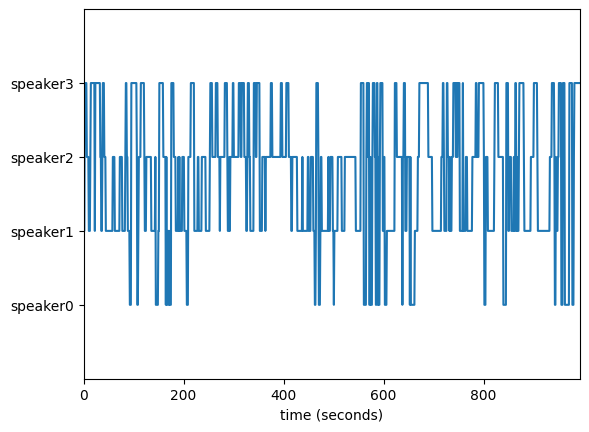

In [51]:
from pyAudioAnalysis import audioSegmentation

segments = audioSegmentation.speaker_diarization(
    filename='./audio.wav', 
    n_speakers=4,
    mid_window=1,
    mid_step=0.1,    
    plot_res=True)



In [53]:
for seg in segments:
    print(seg)
    #print("Speaker: {} - Duration: {} seconds".format(seg[2], seg[1] - seg[0]))

[1 1 3 3 3 3 2 2 2 2 1 1 1 2 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 2 2 1 1
 2 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 1 1 1 1 1 1 2 3 3 2 2 1 1 1 1 0 0 0 3 3 3 3 3 3 3 3 3 3 3 2 0 0 1 2
 2 2 2 3 3 3 3 3 3 3 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 0 0 0 0
 0 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 0 2 0 0 1 1 0 1 0 0 0 3 3 3 3 3 2 2 2 2 1
 1 1 1 1 2 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 0 0 0 2 2 2 2 2 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 3 3 3 3 2 2
 2 2 2 2 2 3 3 3 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 1 1 1 2 1 2 2 2
 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3 3 2 2 3 3 3 3 3 2 2 2 2 1 1 2 3 3 3 2 2
 1 1 1 1 1 1 1 3 3 3 3 2 2 3 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 3 3
 3 3 3 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 1 2 2 2 2 2 1 1 1 0 0 1 3 3 3 3 2 0 0 0 1 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 

In [54]:
len(segments[0])

992

In [50]:
for s in segments[0][0:100]:
    print(s)

0
0
0
0
0
0
0
7
7
7
7
7
7
7
7
7
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
6
6
6
6
6
6
4
4
4
4
4
4
4
0
0
0
0
0
0
0
0
0
0
0
0
4
4
4
4
4
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
6
6
6
6
6
3
3
3
3
3
3
3
3
4
4
4
